In [3]:
!pip install cmake==3.18.2
!pip install multicoretsne
!pip install umap-learn

You should consider upgrading via the '/home/sazha/SaZha/Python/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/sazha/SaZha/Python/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/sazha/SaZha/Python/venv/bin/python -m pip install --upgrade pip' command.


Подключение библиотек

In [4]:
import matplotlib.pyplot as plt
import umap
from sklearn import decomposition, manifold
from sklearn.datasets import fetch_openml, load_digits

Определение алгоритмов

In [5]:
DIMENSION = 2

UMAP = umap.UMAP(n_components=DIMENSION)
TSNE = manifold.TSNE(n_components=DIMENSION)
SVD = decomposition.TruncatedSVD(n_components=DIMENSION)
PCA = decomposition.PCA(n_components=DIMENSION)

algorithms = {
    'PCA': PCA,
    'SVD': SVD,
    'TSNE': TSNE,
    'UMAP': UMAP
}

Определение наборов данных

In [6]:
datasets = {
    'mnist': {'dataId': 554, 'source': fetch_openml},
    'fmnist': {'dataId': 40996, 'source': fetch_openml},
    'shuttle': {'dataId': 40685, 'source': fetch_openml},
    'pendigits': {'dataId': None, 'source': load_digits}
}

Функция обработки набора данных указанным алгоритмом

In [7]:
def processAlgorithm(dataId, source, algorithmName):
    if dataId is None:
        dataset, labels = source(return_X_y=True, as_frame=False)
    else:
        dataset, labels = source(data_id=dataId, return_X_y=True, as_frame=False)

    algorithm = algorithms[algorithmName]
    results = algorithm.fit_transform(dataset)
    color = labels.astype(int)

    return {'results': results, 'color': color}

Функция отображения графиков для одного набора данных, обработанного всеми алгоритмами

In [8]:
def generatePlot(dataId, source, name):
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle(f"{name} dataset", fontsize=16)

    for dataIdx, algorithmName in enumerate(algorithms.keys()):
        processingResult = processAlgorithm(dataId, source, algorithmName)
        results = processingResult['results']
        color = processingResult['color']

        axes[dataIdx].scatter(results[:, 0], results[:, 1], c=color)
        axes[dataIdx].set_xlabel(algorithmName)

Утилитная функция с удобным API для вывода резльтатов

In [9]:
def showResults(datasetName):
    dataset = datasets[datasetName]
    dataId = dataset['dataId']
    source = dataset['source']
    generatePlot(dataId, source, datasetName)

Вывод результатов

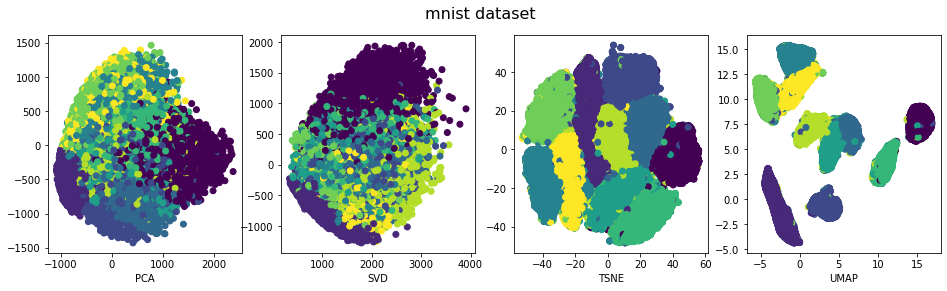

In [11]:
showResults('mnist')

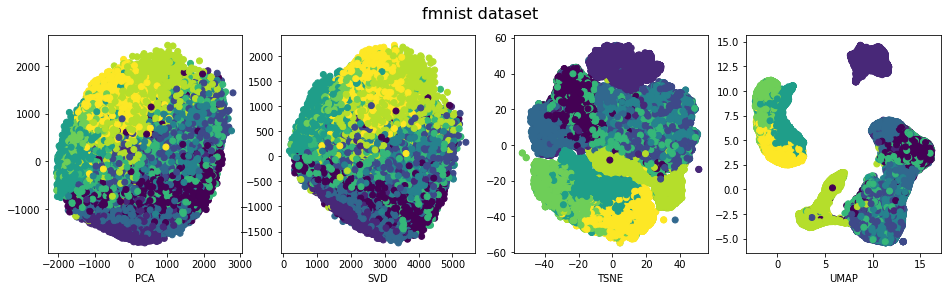

In [10]:
showResults('fmnist')

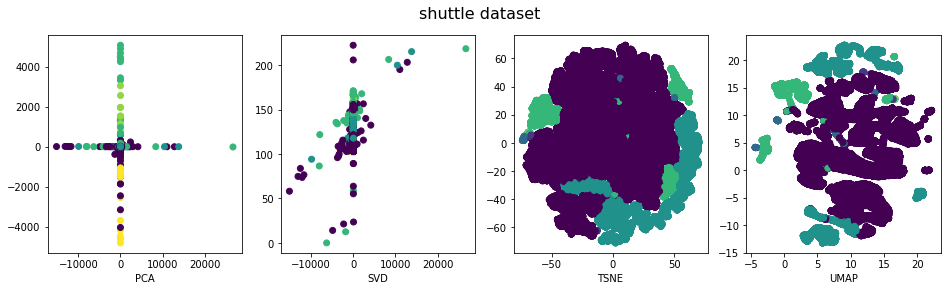

In [11]:
showResults('shuttle')

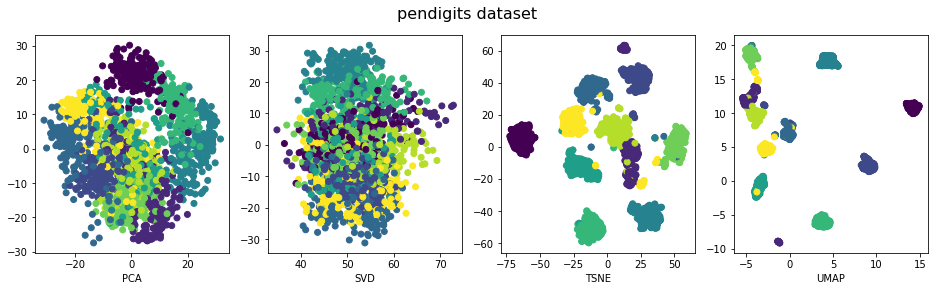

In [12]:
showResults('pendigits')